In [ ]:
"consumer_key": 
	"consumer_secret": ,
	"access_token": "763393365316472832-q6fMBNXTN5BXbHXVQzWrKnsEFPWcScE",
	"access_token_secret": "J8EuMsaA4ZsiGUvvhNimZZ1DUtgEZkRXVrrkkhnGcc0eF"

In [1]:
import numpy as np
import pandas as pd
import tweepy
import re


In [2]:
consumer_key    = "KUYa3ZZKEbOpge0kxDbSPJxvr"
consumer_secret = "rYYb9zUH16gGZAtnYQsl6ScdplDqgy40L362y6gPzzztG4Iuqd"

access_token  = "763393365316472832-q6fMBNXTN5BXbHXVQzWrKnsEFPWcScE"
access_token_secret = "J8EuMsaA4ZsiGUvvhNimZZ1DUtgEZkRXVrrkkhnGcc0eF"

# Authorization to consumer key and consumer secret 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Access to user's access key and access secret 
auth.set_access_token(access_token, access_token_secret)

# Calling api 
api = tweepy.API(auth,wait_on_rate_limit=True)


In [3]:
# Fetching tweets from tweeter starting : "2017-01-01"
msft_tweets = tweepy.Cursor(api.user_timeline, screen_name="elonmusk",lang ="en", since= "2017-01-01",
                            until="2020-10-24", tweet_mode = "extended").items()
# reference : https://stackoverflow.com/questions/33189885/get-all-tweets-call-python-tweepy-cursorapi-search-without-a-q-parameter

In [4]:
# Create a dataframe of tweets with extracted date information
data = pd.DataFrame(data = [[tweet_info.created_at.date(),tweet_info.full_text] 
                            for tweet_info in msft_tweets], columns=['Date','Tweets'])


In [5]:
# printing the dataset
data


,Date,Tweets
0,2020-12-08,@SpaceX Probably 1/3 chance of completing all ...
1,2020-12-08,@SpaceX Hopefully flying tomorrow
2,2020-12-08,@NASASpaceflight Yup
3,2020-12-07,"RT @NASA: Success! At 1:40pm ET, @SpaceX's upg..."
4,2020-12-07,Out on the pad in South Texas https://t.co/RcY...
...,...,...
3243,2020-01-31,@georgezachary There is considerable conflatio...
3244,2020-01-31,@BenYu604 I become Tiesto at night
3245,2020-01-31,@Kevin702 🤣🤣
3246,2020-01-31,Vibbbe https://t.co/21WKNOnMXZ


In [6]:
# checking number of rows
data.shape


(3248, 2)

In [7]:
# Removing special characters from data
total = 1212
index = 0
for index,row in data.iterrows():
    tweet = row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', tweet)
    data.sort_index()
    data.set_value(index,'Date',row["Date"])
    data.set_value(index,'Tweets',my_new_string)
    index = index+1
    
    
    

/Users/simranjariwala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/simranjariwala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [8]:
# print first few rows
data.head()



,Date,Tweets
0,2020-12-08,SpaceX Probably 13 chance of completing all mi...
1,2020-12-08,SpaceX Hopefully flying tomorrow
2,2020-12-08,NASASpaceflight Yup
3,2020-12-07,RT NASA Success At 140pm ET SpaceXs upgraded D...
4,2020-12-07,Out on the pad in South Texas httpstcoRcYOXXpTc2


In [9]:
# further cleaning the tweets

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets



In [10]:
# print first few rows
data



,Date,Tweets
0,2020-12-08,SpaceX Probably 13 chance of completing all mi...
1,2020-12-08,SpaceX Hopefully flying tomorrow
2,2020-12-08,NASASpaceflight Yup
3,2020-12-07,RT NASA Success At 140pm ET SpaceXs upgraded D...
4,2020-12-07,Out on the pad in South Texas httpstcoRcYOXXpTc2
...,...,...
3243,2020-01-31,georgezachary There is considerable conflation...
3244,2020-01-31,BenYu604 I become Tiesto at night
3245,2020-01-31,Kevin702
3246,2020-01-31,Vibbbe httpstco21WKNOnMXZ


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(data['Tweets'].shape[0]):
    compound = analyzer.polarity_scores(data['Tweets'][i])["compound"]
    pos = analyzer.polarity_scores(data['Tweets'][i])["pos"]
    neu = analyzer.polarity_scores(data['Tweets'][i])["neu"]
    neg = analyzer.polarity_scores(data['Tweets'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
     

In [12]:
# Converting dictionary to dataframe 
sentiments_score = pd.DataFrame.from_dict(scores)

# then joining both dataframes
tweets_data = data.join(sentiments_score)
tweets_data



,Date,Tweets,Compound,Positive,Negative,Neutral
0,2020-12-08,SpaceX Probably 13 chance of completing all mi...,0.2500,0.200,0.000,0.800
1,2020-12-08,SpaceX Hopefully flying tomorrow,0.4019,0.474,0.000,0.526
2,2020-12-08,NASASpaceflight Yup,0.0000,0.000,0.000,1.000
3,2020-12-07,RT NASA Success At 140pm ET SpaceXs upgraded D...,0.5719,0.163,0.000,0.837
4,2020-12-07,Out on the pad in South Texas httpstcoRcYOXXpTc2,0.0000,0.000,0.000,1.000
...,...,...,...,...,...,...
3243,2020-01-31,georgezachary There is considerable conflation...,-0.7269,0.000,0.138,0.862
3244,2020-01-31,BenYu604 I become Tiesto at night,0.0000,0.000,0.000,1.000
3245,2020-01-31,Kevin702,0.0000,0.000,0.000,1.000
3246,2020-01-31,Vibbbe httpstco21WKNOnMXZ,0.0000,0.000,0.000,1.000


In [13]:
###########
from datetime import datetime as dt
em = tweets_data

from pandas_datareader import data

#Load daily Tesla Adjusted Close data and compute log returns
start_date = "2017-01-01"
end_date = "2020-10-24"

panel_data = data.DataReader("TSLA", "yahoo",start_date, end_date)
tesla = pd.DataFrame(data = panel_data['Adj Close'])
tesla['log_ret'] = np.log(tesla['Adj Close'].shift(-1)) - np.log(tesla['Adj Close'])


#Construct average sentiment on each day
prev_d = dt.fromisoformat(start_date).date()
avg_negative = []
for date in tesla.index.values:
    d = pd.to_datetime(date).date()
    #tesla.loc[tesla.index == date] = np.mean(em.loc[(em.Date <= d) & (em.Date > prev_d)].Sentiment)
    avg = np.mean(em.loc[(em.Date <= d) & (em.Date > prev_d)].Negative)
    if np.isnan(avg):
        avg_negative.append(0)
    else:
        avg_negative.append(avg)
    prev_d = d
tesla['Ave_Negative'] = avg_negative


#Construct average sentiment on each day
prev_d = dt.fromisoformat(start_date).date()
avg_positive = []
for date in tesla.index.values:
    d = pd.to_datetime(date).date()
    #tesla.loc[tesla.index == date] = np.mean(em.loc[(em.Date <= d) & (em.Date > prev_d)].Sentiment)
    avg = np.mean(em.loc[(em.Date <= d) & (em.Date > prev_d)].Positive)
    if np.isnan(avg):
        avg_positive.append(0)
    else:
        avg_positive.append(avg)
    prev_d = d
tesla['Ave_Positive'] = avg_positive

#Drop final row
tesla = tesla.iloc[:-1,]
tesla

,Adj Close,log_ret,Ave_Negative,Ave_Positive
Date,,,,
2017-01-03,43.397999,0.045055,0.000000,0.000000
2017-01-04,45.397999,-0.001058,0.000000,0.000000
2017-01-05,45.349998,0.009918,0.000000,0.000000
2017-01-06,45.801998,0.009863,0.000000,0.000000
2017-01-09,46.256001,-0.006115,0.000000,0.000000
...,...,...,...,...
2020-10-16,439.670013,-0.020311,0.014700,0.279700
2020-10-19,430.829987,-0.020850,0.056444,0.173556
2020-10-20,421.940002,0.001658,0.122000,0.079000


In [14]:
tesla.reset_index(drop = False, inplace = True)
tesla

,Date,Adj Close,log_ret,Ave_Negative,Ave_Positive
0,2017-01-03,43.397999,0.045055,0.000000,0.000000
1,2017-01-04,45.397999,-0.001058,0.000000,0.000000
2,2017-01-05,45.349998,0.009918,0.000000,0.000000
3,2017-01-06,45.801998,0.009863,0.000000,0.000000
4,2017-01-09,46.256001,-0.006115,0.000000,0.000000
...,...,...,...,...,...
954,2020-10-16,439.670013,-0.020311,0.014700,0.279700
955,2020-10-19,430.829987,-0.020850,0.056444,0.173556
956,2020-10-20,421.940002,0.001658,0.122000,0.079000
957,2020-10-21,422.640015,0.007425,0.009444,0.019222


In [15]:
tesla2 = tesla.drop(['log_ret'], 1)
tesla2

,Date,Adj Close,Ave_Negative,Ave_Positive
0,2017-01-03,43.397999,0.000000,0.000000
1,2017-01-04,45.397999,0.000000,0.000000
2,2017-01-05,45.349998,0.000000,0.000000
3,2017-01-06,45.801998,0.000000,0.000000
4,2017-01-09,46.256001,0.000000,0.000000
...,...,...,...,...
954,2020-10-16,439.670013,0.014700,0.279700
955,2020-10-19,430.829987,0.056444,0.173556
956,2020-10-20,421.940002,0.122000,0.079000
957,2020-10-21,422.640015,0.009444,0.019222


In [16]:
X = np.array(tesla.drop(['Date','Adj Close','log_ret'], 1))
print(X)

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [0.122      0.079     ]
 [0.00944444 0.01922222]
 [0.01872727 0.25218182]]


In [17]:
#y = np.array(tesla['Adj Close'])
#print(y)
y = pd.DataFrame(tesla['Adj Close'])
print(y)


      Adj Close
0     43.397999
1     45.397999
2     45.349998
3     45.801998
4     46.256001
..          ...
954  439.670013
955  430.829987
956  421.940002
957  422.640015
958  425.790009

[959 rows x 1 columns]


In [18]:
x_train=X[:800]
y_train=y[:800]
x_test_val=X[800:]
y_test_val=y[800:]
print(x_train.shape)
print(y_train.shape)
print(x_test_val.shape)
print(y_test_val.shape)

(800, 2)
(800, 1)
(159, 2)
(159, 1)


In [19]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

/Users/simranjariwala/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/simranjariwala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
prediction, bias, contributions = ti.predict(rf,x_test_val)

In [21]:
print(prediction)

[[151.73620148]
 [155.8173996 ]
 [155.32780151]
 [ 61.76996156]
 [153.93679962]
 [154.3267952 ]
 [154.3267952 ]
 [155.8173996 ]
 [152.31060181]
 [153.75620117]
 [147.58139877]
 [157.6869957 ]
 [153.85739899]
 [157.46480103]
 [150.85659943]
 [148.11920166]
 [180.59699554]
 [158.8567955 ]
 [163.16259384]
 [153.85739899]
 [178.62640076]
 [159.34640045]
 [141.64239655]
 [158.8567955 ]
 [139.91879883]
 [155.8173996 ]
 [125.43819809]
 [139.03320007]
 [151.77460022]
 [151.861203  ]
 [155.8173996 ]
 [147.28619843]
 [149.31879578]
 [156.14299927]
 [ 61.76996156]
 [155.80780182]
 [137.09459915]
 [125.43819809]
 [152.49699707]
 [153.53039627]
 [153.64219971]
 [155.02100067]
 [154.75139771]
 [155.8173996 ]
 [151.9378006 ]
 [156.63059692]
 [151.9378006 ]
 [153.02460175]
 [181.66239624]
 [153.75620117]
 [180.59699554]
 [178.62640076]
 [164.16159821]
 [159.79279938]
 [163.64679565]
 [ 61.76996156]
 [137.3473999 ]
 [144.62559967]
 [153.33980103]
 [ 61.76996156]
 [125.43819809]
 [158.30979614]
 [164.36

In [22]:
test_start_index = 801
test_end_index =958
idx=np.arange(int(test_start_index),int(test_end_index)+2)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])
predictions_df_

,Prices
801,151.736201
802,155.817400
803,155.327802
804,61.769962
805,153.936800
...,...
955,149.776598
956,155.817400
957,136.855802
958,61.769962


In [23]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.style.use('fivethirtyeight')
plt.title('Random Forest Regressor Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(predictions_df_,'g')
plt.plot(y_test_val)
plt.legend(['Prediction','Actual' ], loc='lower right')
plt.show()

<Figure size 1600x800 with 1 Axes>

In [24]:
accuracy=rf.score(x_train,y_train)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

Accuracy is: 62.5615 %


In [26]:
from sklearn.linear_model import LinearRegression
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [27]:
#Show the model linear regression prediction
#prediction, bias, contributions = ti.predict(rf,x_test_val)
prediction= lr.predict(x_test_val)
print(prediction)

[[156.1960524 ]
 [140.74943735]
 [235.78503306]
 [ 62.11837479]
 [158.02833235]
 [127.7688971 ]
 [127.97082323]
 [141.55841045]
 [175.50993404]
 [150.15535659]
 [124.22297279]
 [131.28634082]
 [145.4443588 ]
 [147.39395913]
 [140.56385893]
 [100.98179109]
 [220.28795502]
 [140.14637112]
 [131.50892592]
 [146.1422852 ]
 [157.01716428]
 [143.29771957]
 [124.93785532]
 [132.92918165]
 [120.7861752 ]
 [146.42555552]
 [120.3500001 ]
 [109.82046035]
 [128.55424164]
 [161.45496442]
 [141.02746609]
 [166.71873162]
 [125.68002838]
 [150.90524775]
 [ 62.11837479]
 [220.72477008]
 [112.93662218]
 [121.06517162]
 [168.93720785]
 [129.68386249]
 [192.69647546]
 [143.48747741]
 [148.32029709]
 [140.58013986]
 [167.16909199]
 [138.31782346]
 [174.11024693]
 [154.72011044]
 [181.76629519]
 [156.67956698]
 [389.19744502]
 [153.24488192]
 [126.31807726]
 [136.3140607 ]
 [131.6239574 ]
 [ 62.11837479]
 [113.17134535]
 [107.77233765]
 [ 77.65130214]
 [ 62.11837479]
 [123.81821039]
 [121.73522929]
 [130.97

In [28]:
test_start_index = 801
test_end_index = 958
idx=np.arange(int(test_start_index),int(test_end_index)+2)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])
predictions_df_

,Prices
801,156.196052
802,140.749437
803,235.785033
804,62.118375
805,158.028332
...,...
955,188.014234
956,145.921371
957,111.831525
958,71.783506


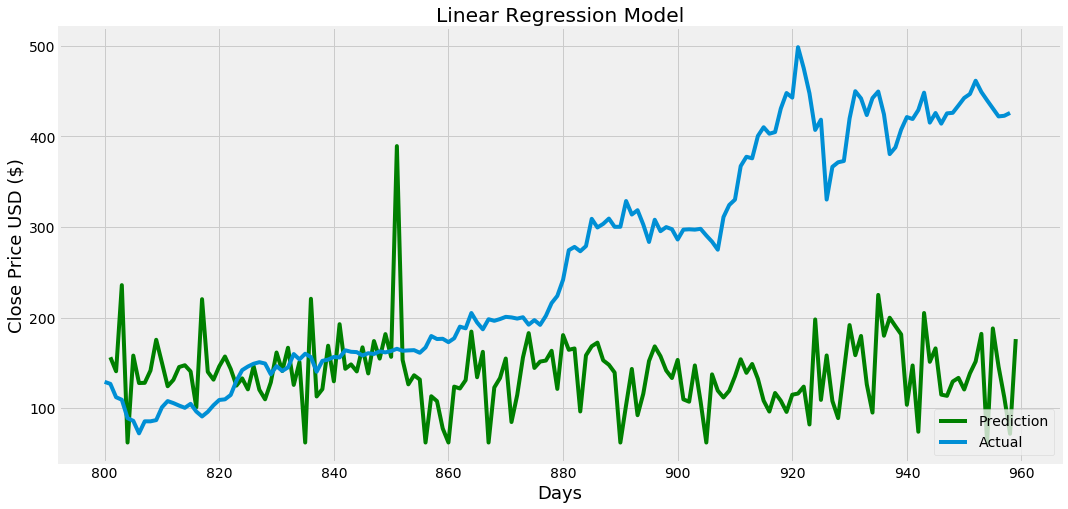

In [29]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.style.use('fivethirtyeight')
plt.title('Linear Regression Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(predictions_df_,'g')
plt.plot(y_test_val)
plt.legend(['Prediction','Actual' ], loc='lower right')
plt.show()

In [30]:
accuracy=lr.score(x_train,y_train)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 53.0836 %


/Users/simranjariwala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


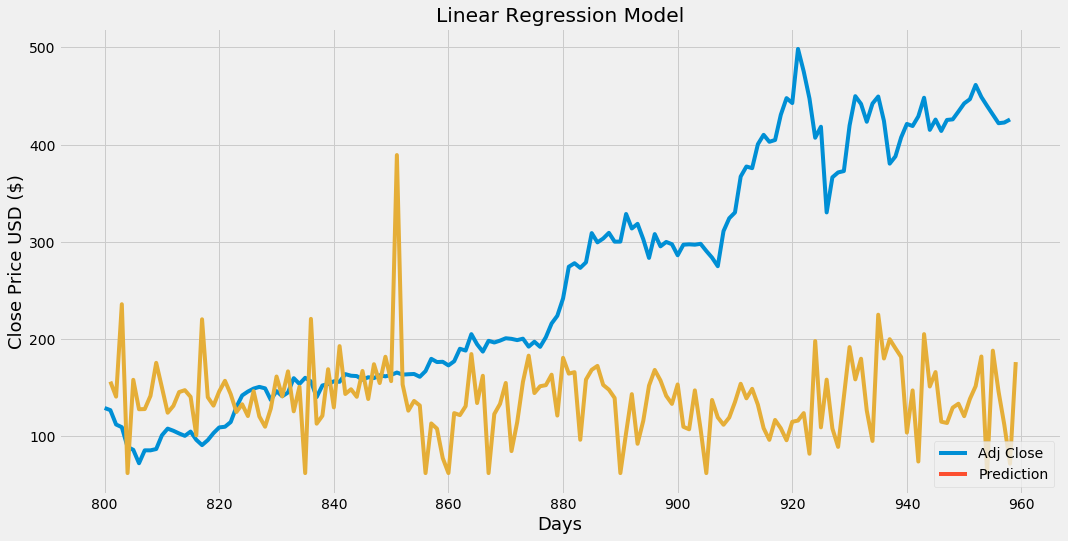

In [32]:
####
#Visualize the data
LR_predictions = predictions_df_['Prices']
#Plot the data
valid1 =  tesla[X.shape[0]:]
valid1['Predictions'] = LR_predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.style.use('fivethirtyeight')
plt.title('Linear Regression Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(tesla['Adj Close'][800:])
plt.plot(valid1[['Adj Close','Predictions']])
plt.legend(['Adj Close','Prediction'], loc='lower right')
plt.show()

In [34]:
# Decision Tree Regreession
from sklearn.tree import DecisionTreeRegressor
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [35]:
#Show the model tree prediction
prediction = tree.predict(x_test_val)
print(prediction)

[149.102005   156.         160.80000305  61.70566491 149.102005
 159.98199463 159.98199463 156.         149.102005   154.2559967
 130.11399841 159.98199463 160.0059967  154.2559967  160.0059967
 179.88200378 183.48399353 171.67999268 171.67999268 156.
 177.41200256 160.0059967  130.11399841 171.67999268 130.11399841
 156.         121.59999847 121.59999847 171.67999268 149.102005
 156.         149.61399841 159.98199463 149.8999939   61.70566491
 160.80000305 179.88200378 121.59999847 149.61399841 159.98199463
 155.75999451 156.         154.2559967  156.         149.102005
 160.0059967  149.102005   154.2559967  183.48399353 154.2559967
 183.48399353 177.41200256 159.98199463 160.0059967  153.45799255
  61.70566491 121.59999847 121.59999847 135.80000305  61.70566491
 121.59999847 153.45799255 171.67999268 155.75999451 171.67999268
 149.102005    61.70566491 130.11399841 171.67999268 171.67999268
 133.5980072  121.59999847 149.8999939  155.75999451 160.0059967
 149.61399841 149.61399841 1

In [36]:
test_start_index = 801
test_end_index = 958
idx=np.arange(int(test_start_index),int(test_end_index)+2)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])
predictions_df_

,Prices
801,149.102005
802,156.000000
803,160.800003
804,61.705665
805,149.102005
...,...
955,155.759995
956,156.000000
957,179.882004
958,61.705665


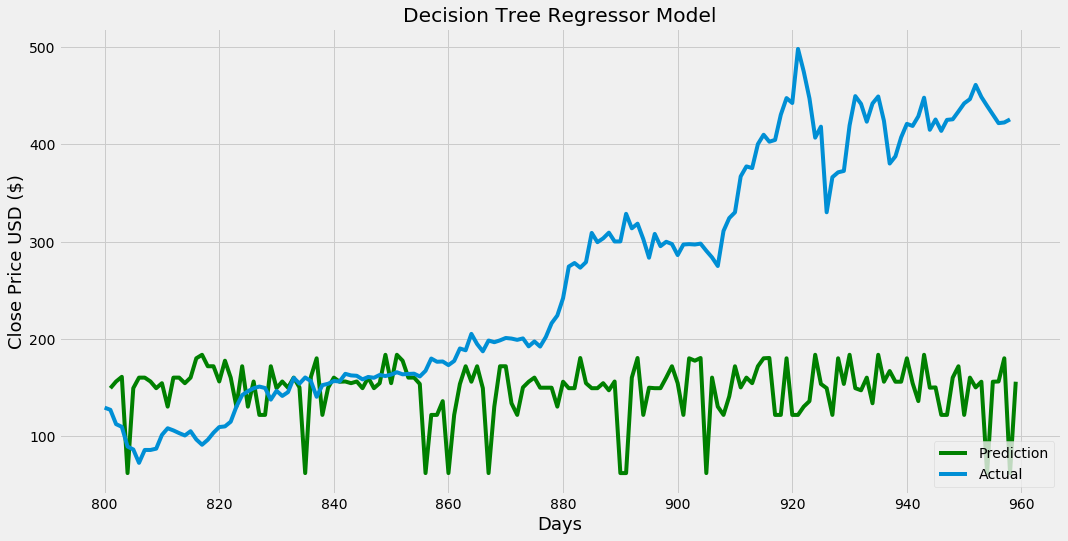

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.style.use('fivethirtyeight')
plt.title('Decision Tree Regressor Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(predictions_df_,'g')
plt.plot(y_test_val)
plt.legend(['Prediction','Actual' ], loc='lower right')
plt.show()

In [38]:
accuracy=tree.score(x_train,y_train)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 63.1665 %


/Users/simranjariwala/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


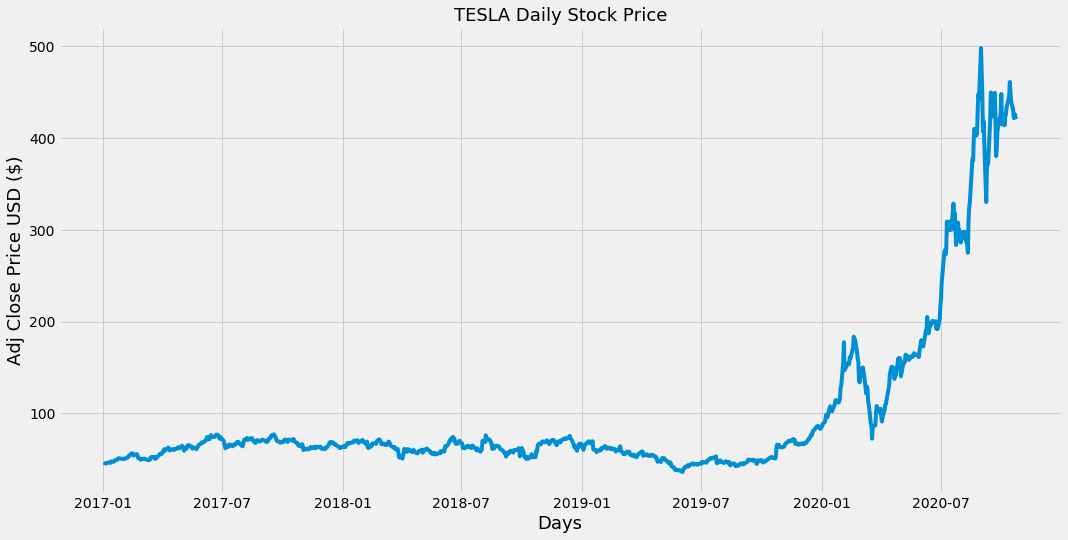

In [48]:
# plotting the dependent variable Close Price
plt.figure(figsize=(16,8))
plt.title('TESLA Daily Stock Price', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Adj Close Price USD ($)', fontsize = 18)
plt.plot(tesla_price['Adj Close'])
plt.show()
